1. Implement a function to perform rotation on a given image by a specified angle
(in degrees).
2. Apply the rotation function to a set of images with varying rotation angles (e.g.,
30°, 60°, -45°) and visualize the results.
3. Compare the results of your rotation implementation with a built-in rotation
function from a popular image processing library (e.g., OpenCV). Discuss any
differences or similarities observed.

index 0 1 2
index 1 3 4
index 2 5 6
index 3 7 8


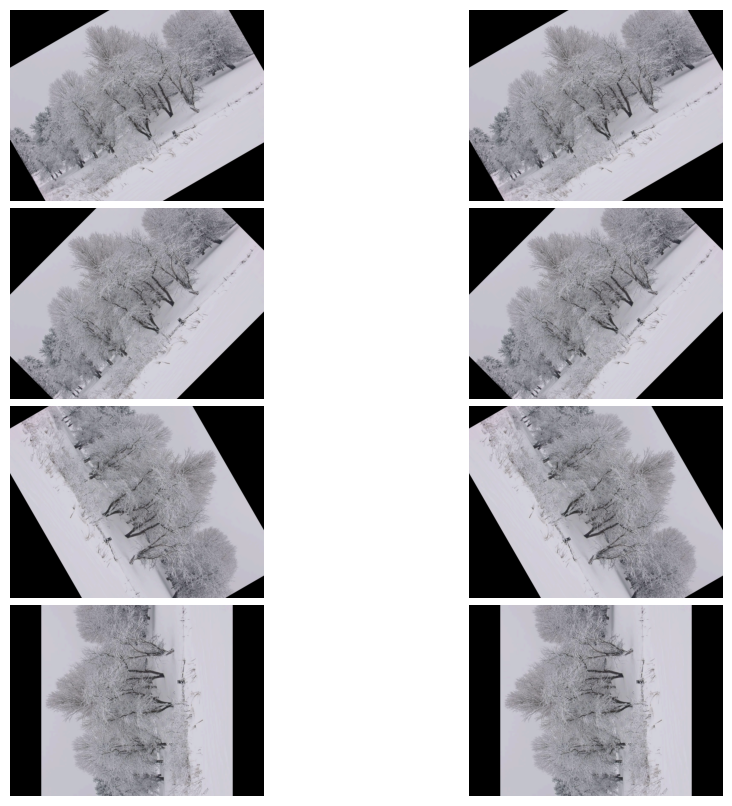

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def loadImage(imagePath):
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def rotate(cvImage, rotationAngle):
    height, width = cvImage.shape[:2]
    centerX, centerY = (width // 2, height // 2)
    M = cv2.getRotationMatrix2D((centerX, centerY), rotationAngle, 1.0)
    rotated = cv2.warpAffine(cvImage, M, (width, height))
    return rotated

def rotateImageCustom(image, angle):
    # Convert angle to radians
    angle_rad = np.deg2rad(angle)
    cos_val = np.cos(angle_rad)
    sin_val = np.sin(angle_rad)

    h, w = image.shape[:2]
    
    cx, cy = w // 2, h // 2

    # Output image size (bounding box)
    new_w = int(abs(w * cos_val) + abs(h * sin_val))
    new_h = int(abs(h * cos_val) + abs(w * sin_val))

    # Create the output image
    rotated_image = np.zeros((new_h, new_w, 3), dtype=image.dtype)

    # Center of new image
    new_cx, new_cy = new_w // 2, new_h // 2

    for y in range(new_h):
        for x in range(new_w):
            # Coordinate from original image
            xt = (x - new_cx)
            yt = (y - new_cy)

            orig_x = int(cos_val * xt - sin_val * yt + cx)
            orig_y = int(sin_val * xt + cos_val * yt + cy)

            if 0 <= orig_x < w and 0 <= orig_y < h:
                rotated_image[y, x] = image[orig_y, orig_x]

    return rotated_image


listAngle = [30, 45, -60, 90]
cvImageLoaded = loadImage('data/forest.png')
plt.figure(figsize=(12, 8))
for i, rotationAngle in enumerate(listAngle):
    rotatedImage = rotate(cvImageLoaded, rotationAngle)   
    rotatedImageCustom = rotateImageCustom(cvImageLoaded, rotationAngle)
    
    plt.subplot(4, 2, 2* i + 1)
    plt.imshow(rotatedImage)
    plt.axis('off')
    plt.subplot(4, 2, 2* i + 2)
    plt.imshow(rotatedImage)
    plt.axis('off')

plt.subplots_adjust(hspace=0.2, wspace=0.05)
plt.tight_layout(pad=0.5) 
plt.show()

Task 2: Transformation Matrix Calculation
1. Implement a function to calculate the transformation matrix for a given
translation (dx, dy) and scaling factors (sx, sy).
2. Apply the transformation matrix to a set of images along with the translation and
scaling parameters.
3. Visualize and compare the transformed images with the original ones.



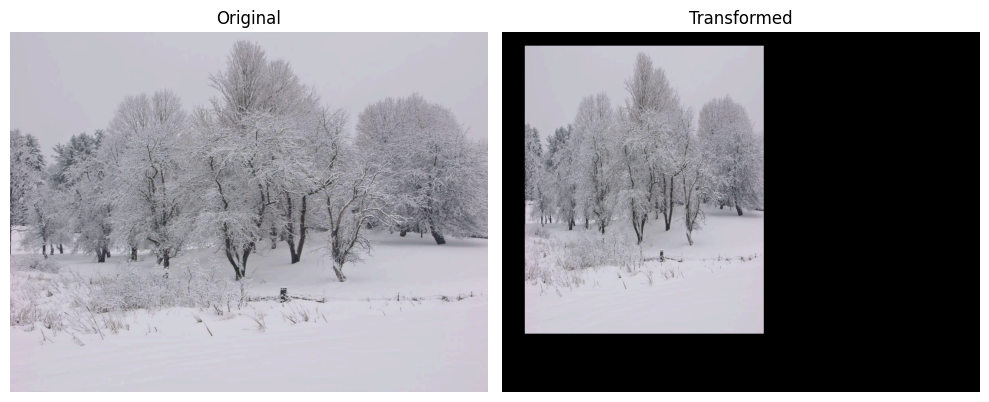

In [34]:
import numpy as np

import cv2


def apply_transformation_manual(image, matrix):
    """
    Manually applies an affine transformation using inverse mapping.
    """
    h, w = image.shape[:2]
    output = np.zeros_like(image)  # Same size as original

    # Invert the transformation matrix
    T = np.linalg.inv(matrix)
    #              T = [
    #                       [sx, 0, dx],
    #                       [0, sy, dy],
    #                       [0,  0,  1]
    #                   ]
    #
    #

    for y_new in range(h):
        for x_new in range(w):
            # New point in homogeneous coordinates
            dest_coords = np.array([x_new, y_new, 1])

            # Find corresponding source coordinates
            
            # dest_cords = [
            #                x_new,
            #                y_new,
            #                1
            #               ]
            #   src_coords = (𝑇 )^ -1 ⋅ dest_coords 
            
            src_coords = T @ dest_coords
            x_src, y_src = src_coords[:2]

            # Nearest neighbor sampling
            x_src = int(round(x_src))
            y_src = int(round(y_src))

            # Only use valid coordinates
            if 0 <= x_src < w and 0 <= y_src < h:
                output[y_new, x_new] = image[y_src, x_src]

    return output

image = cv2.imread('data/forest.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

dx, dy = 50, 30
sx, sy = 0.5, 0.8

#transformation Matrix
T = np.array([
    [sx, 0, dx],
    [0, sy, dy],
    [0, 0, 1]
])

transformed = apply_transformation_manual(image, T)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed)
plt.title("Transformed")
plt.axis('off')

plt.tight_layout()
plt.show()




Task 3: Combining Transformations
1. Implement a function that combines multiple transformations (e.g., rotation
followed by translation).
2. Apply the combined transformation to a set of images and visualize the results.
3. Discuss the order of applying transformations and its impact on the final outcome.

R = [
        [cosθ, -sinθ, 0],
        [sinθ,  cosθ, 0],
        [   0,     0, 1]
    ]

S = [
        [sx, 0, 0],
        [0, sy, 0],
        [0,  0, 1]
    ]

T = [
        [1, 0, dx],
        [0, 1, dy],
        [0,  0,  1]
    ]

Combined=T⋅R⋅S


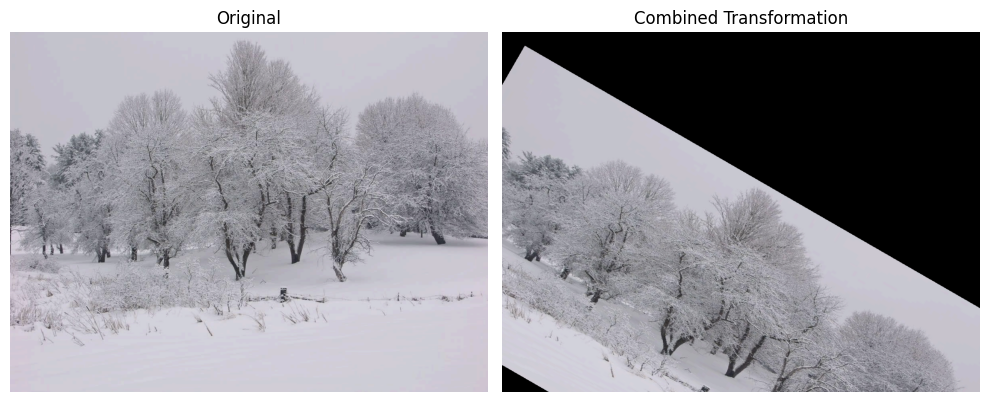

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_translation_matrix(dx, dy):
    return np.array([
        [1, 0, dx],
        [0, 1, dy],
        [0, 0, 1]
    ])

def get_scaling_matrix(sx, sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])

def get_rotation_matrix(angle_degrees):
    theta = np.radians(angle_degrees)
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])

def apply_transformation_manual(image, matrix):
    h, w = image.shape[:2]
    output = np.zeros_like(image)

    inv_matrix = np.linalg.inv(matrix)

    for y in range(h):
        for x in range(w):
            dest_coords = np.array([x, y, 1])
            src_coords = inv_matrix @ dest_coords
            x_src, y_src = src_coords[:2]
            x_src = int(round(x_src))
            y_src = int(round(y_src))
            if 0 <= x_src < w and 0 <= y_src < h:
                output[y, x] = image[y_src, x_src]

    return output


image = cv2.imread('data/forest.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define transformations
R = get_rotation_matrix(30)
S = get_scaling_matrix(1.2, 0.8)
T = get_translation_matrix(50, 30)

# Combine: First scale, then rotate, then translate
combined = T @ R @ S

# Apply
transformed_image = apply_transformation_manual(image, combined)

# Visualize
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(transformed_image)
plt.title("Combined Transformation")
plt.axis("off")

plt.tight_layout()
plt.show()
